<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220628_ML14_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # 비지도 학습 clustering 알고리즘
from sklearn.decomposition import PCA # 주성분 분석, 비지도 학습

# Fruit datasets

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !(linux명령어)
# wget 파일저장위치(URL) -O 파일이름 : URL에서 데이터를 다운로드해서 파일에 저장.

--2022-06-29 01:06:59--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-29 01:06:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-29 01:07:00--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

npy 파일 : numpy의 배열을 저장한 파일 타입
* `np.save(file, arr)` : 배열 arr을 파일 file에 npy 포맷으로 저장.
* `np.load(file)` : npy 포맷으로 저장된 파일을 읽어서 배열을 복원.

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape # (n_samples, height, width)

(300, 100, 100)

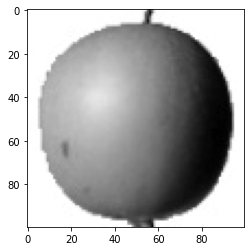

In [ ]:
# 첫 번째 이미지 시각화
img = fruits[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 10x10 subplot을 생성해서 이미지 100개를 시각화
def plot_fruits(arr, n_rows=10, n_cols=10, start=0):
    # n_rows x n_cols 개수의 subplot들을 생성
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    for i in range(n_rows):
        for j in range(n_cols):
            img = arr[start + i * n_cols + j]
            ax[i, j].imshow(img, cmap='binary')
            ax[i, j].axis('off')
    plt.show()

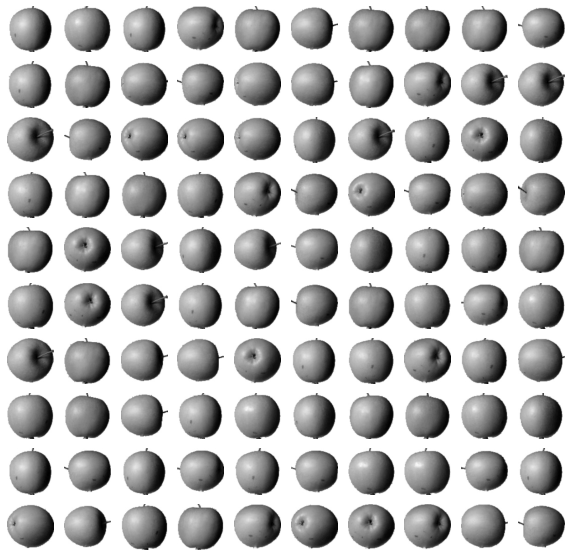

In [ ]:
plot_fruits(fruits)

# Pixel 분석

In [ ]:
# (300, 100, 100) shape의 3차원 배열을 (300, 100*100) shape의 2차원 배열로 변환
apple = fruits[:100, :, :].reshape((100, -1)) # (100, 100*100)
pineapple = fruits[100:200, :, :].reshape((100, -1))
banana = fruits[200:, :, :].reshape((100, -1))

In [ ]:
apple.shape, pineapple.shape, banana.shape # shape : (n_samples, n_pixels)

((100, 10000), (100, 10000), (100, 10000))

# 각 샘플에서 픽셀들의 평균값

In [ ]:
apple_mean = np.mean(apple, axis=1)
apple_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [ ]:
pineapple_mean = np.mean(pineapple, axis=1)
pineapple_mean

array([ 99.3239,  87.1622,  97.193 ,  97.4689,  98.8892,  97.8819,
        95.1444,  92.9461,  95.8412,  96.9487,  93.2863, 101.2771,
        91.6511,  98.3901,  84.3277, 100.7017,  99.0229,  87.5298,
        99.4109,  91.8568,  90.3877,  99.5066,  95.8498,  96.0728,
       100.0062,  95.5283,  95.2715,  98.1624,  93.1395,  99.1666,
        99.9519,  96.732 ,  94.16  , 100.7644, 101.1263,  98.2852,
        98.5354, 101.3809,  95.4862,  93.1256,  87.6404,  93.7146,
        94.7279,  85.5131,  95.0937,  95.3236,  92.7696,  94.4375,
        99.36  ,  95.8924,  97.8221,  99.4014,  99.325 ,  95.025 ,
        97.5771,  97.3511,  99.4891,  97.366 , 101.0062,  91.2304,
        95.2824,  95.3544, 101.4657,  97.5239,  98.8419,  96.746 ,
        98.2922,  96.3969,  81.9464,  93.4927,  97.3872,  82.4883,
        95.3665,  95.2541, 101.3074,  97.2391,  95.4544, 100.5576,
       100.2927,  94.3088,  95.7401,  97.0982,  96.9559,  92.9114,
        97.4164, 100.769 ,  97.808 ,  99.2481, 101.0643,  94.8

In [ ]:
banana_mean = np.mean(banana, axis=1)
banana_mean

array([19.5487, 24.4884, 36.7517, 18.568 , 53.572 , 31.5789, 51.9062,
       28.4703, 23.7856, 32.1295, 29.1737, 24.5578, 27.7676, 41.3082,
       61.0437, 32.6444, 38.4187, 30.4175, 30.0639, 21.4994, 32.6018,
       39.6335, 47.8397, 57.7484, 33.6511, 23.5018, 49.6817, 44.0855,
       46.1559, 33.4963, 36.0099, 69.0751, 33.9575, 32.8786, 60.1911,
       32.9949, 45.3359, 56.1694, 36.9218, 25.6754, 32.7901, 29.0245,
       57.7134, 44.6563, 31.2138, 29.836 , 40.9228, 23.7501, 43.1543,
       32.3716, 26.0986, 55.6189, 22.2269, 29.5089, 24.0435, 22.6247,
       24.1709, 46.2714, 32.0763, 42.5076, 44.5522, 24.0199, 27.68  ,
       32.4377, 19.2198, 22.5083, 19.6742, 26.1852, 25.8368, 25.2676,
       26.4721, 34.8503, 28.5235, 80.8545, 36.9371, 47.3975, 18.7909,
       33.0428, 37.8222, 34.7819, 33.6051, 24.3963, 32.7988, 19.7609,
       32.538 , 28.5407, 23.0999, 26.3778, 27.1965, 38.7848, 18.7648,
       30.2297, 54.3816, 37.9073, 32.3126, 31.0664, 33.1657, 37.6051,
       38.1806, 26.2

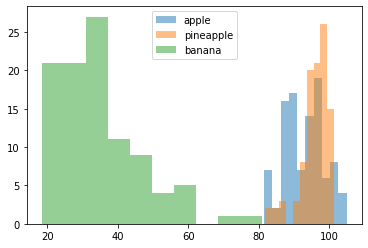

In [ ]:
# 과일의 픽셀 평균값의 분포 - histogram
plt.hist(apple_mean, alpha=0.5, label='apple')
plt.hist(pineapple_mean, alpha=0.5, label='pineapple')
plt.hist(banana_mean, alpha=0.5, label='banana')

plt.legend()
plt.show()

## 각 픽셀 별로 평균 분석

In [ ]:
apple_px_mean = np.mean(apple, axis=0)
pineapple_px_mean = np.mean(pineapple, axis=0)
banana_px_mean = np.mean(banana, axis=0)

In [ ]:
apple_px_mean.shape, pineapple_px_mean.shape, banana_px_mean.shape

((10000,), (10000,), (10000,))

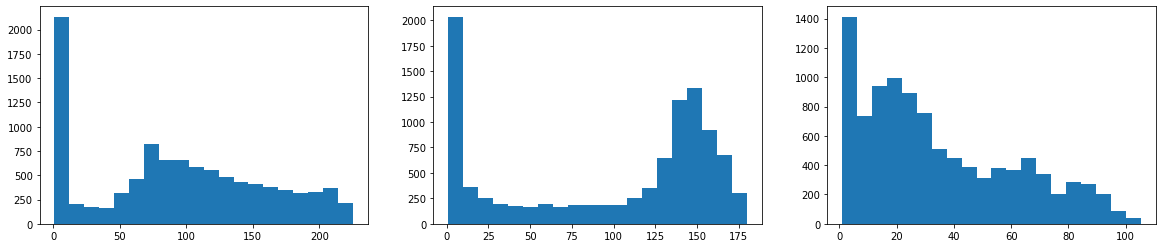

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].hist(apple_px_mean, bins=20)
ax[1].hist(pineapple_px_mean, bins=20)
ax[2].hist(banana_px_mean, bins=20)
plt.show()

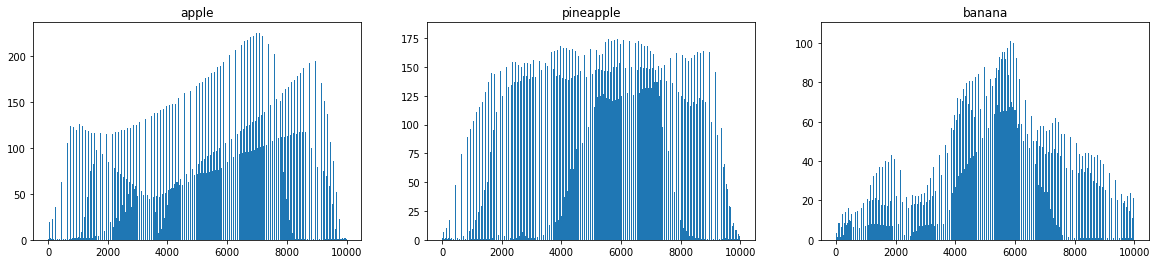

In [ ]:
# 각 픽셀 평균값의 크기를 막대 그래프로 표현
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
x_values = np.arange(100 * 100) # 0 ~ 9999
ax[0].bar(x_values, apple_px_mean)
ax[0].set_title('apple')
ax[1].bar(x_values, pineapple_px_mean)
ax[1].set_title('pineapple')
ax[2].bar(x_values, banana_px_mean)
ax[2].set_title('banana')

plt.show()

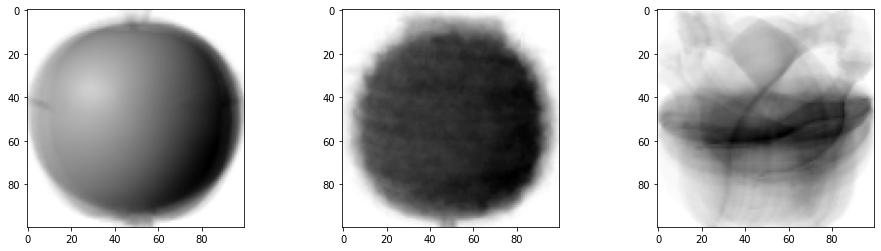

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ax[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[1].imshow(pineapple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

# 픽셀들의 평균값과 가까운 이미지 찾기

* diff = 실제 픽셀값 - 픽셀 평균값
* diff의 절댓값
* diff 절댓값들의 평균
* diff 절댓값 평균이 작은 순서로 선택

In [ ]:
fruits_2d = fruits.reshape((300, -1))
fruits_2d.shape  # (n_samples, n_pixels)

(300, 10000)

In [ ]:
diff = fruits_2d - apple_px_mean  # 실젯값과 평균값의 차이
diff_abs = np.abs(diff)  # 차이들의 절대값
diff_abs_mean = np.mean(diff_abs, axis=1)  # 차이의 절대값들의 평균
diff_abs_mean  #> shape: (300,)

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

## 사과 픽셀 평균값과 비슷한 이미지 찾기

In [ ]:
# np.argsort(arr): 배열 arr을 (오름차순) 정렬한 인덱스를 리턴.
apple_like_idx = np.argsort(diff_abs_mean)
apple_like_idx[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

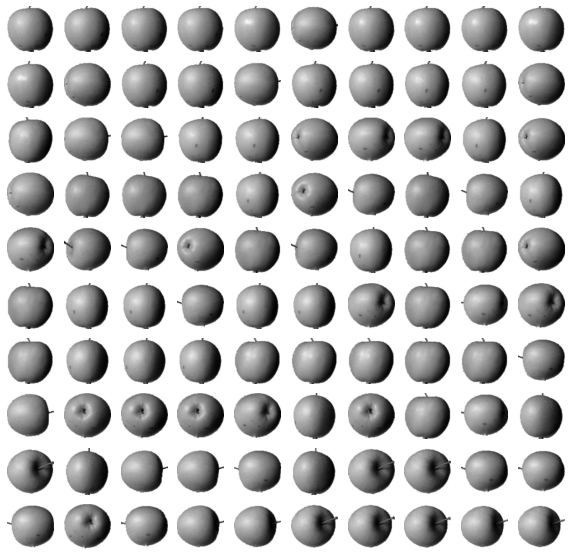

In [ ]:
apple_like = fruits[apple_like_idx]
plot_fruits(apple_like)

## 파인애플 픽셀 평균값과 비슷한 이미지 찾기

In [ ]:
abs_diff = np.abs(fruits_2d - pineapple_px_mean) # (실젯값 - 평균)의 절댓값
mean_abs_diff = np.mean(abs_diff, axis=1)        # (실젯값 - 평균)의 절댓값들의 평균
pineapple_like_idx = np.argsort(mean_abs_diff)   # 오름차순 정렬한 index
pineapple_like_idx

array([111, 152, 164, 137, 136, 129, 166, 150, 165, 101, 174, 192, 117,
       140, 182, 184, 148, 181, 100, 193, 191, 120, 175, 162, 154, 157,
       155, 186, 121, 103, 122, 145, 138, 161, 118, 176, 160, 127, 144,
       156, 158, 105, 104, 102, 188, 124, 112, 198, 185, 177, 133, 125,
       131, 109, 180, 110, 106, 149, 115, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 113, 108, 139, 130, 197, 134, 116, 199, 172,  77,
       179, 146, 178, 194, 114, 173, 196,  32,  46,  71, 126, 132, 153,
        29,  15,  69,  79,   7,  12,  98,  63,  39,  11,  35,  24,  25,
        90,  38,  72,   6,  23,  19,   5,  96,  51,  55,  36,  41,  26,
        10,  65,  43,  75,  82,  61,  95,  20,  99,  21,  89,  22,  80,
         2,  28,  56,  60,  64,  14,   0,  52,  53,  18,  73,  67,  62,
        30,  84,  13,  34,  66,  47,  91,  97,   4,  48,  70,  33,  57,
         1,  27,  59,  78,  49,  40,  87,  68,  93,  37,  76,  5

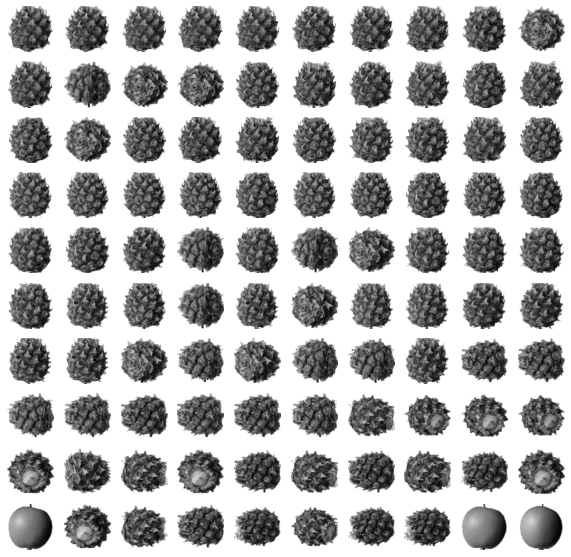

In [ ]:
pineapple_like = fruits[pineapple_like_idx]
plot_fruits(pineapple_like)

## 바나나 픽셀 평균값과 비슷한 이미지 찾기

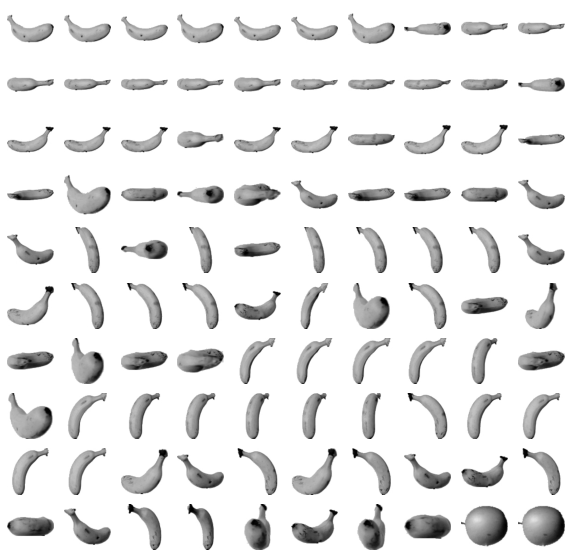

In [ ]:
abs_diff = np.abs(fruits_2d - banana_px_mean)
mean_abs_diff = np.mean(abs_diff, axis=1)
banana_like_idx = np.argsort(mean_abs_diff)
plot_fruits(fruits[banana_like_idx])

# K-Means Clustering(K-평균 군집화)

1. 무작위로 k개의 클러스터들의 중심(centroid)을 설정.
1. 각 샘플에서 가장 가까운 클러스터의 중심을 찾아서 해당 클러스터의 샘플로 지정.
1. 각 클러스터에 속한 샘플들의 평균값으로 클러스터의 중심을 이동.
1. 2,3번 과정을 클러스터의 중심의 변화가 없을 때까지 반복.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42) # KMeans 객체 생성

In [ ]:
kmeans.fit(fruits_2d) # 데이터(X)만 학습. 레이블(y) 없음. → "비지도 학습"

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [ ]:
kmeans.cluster_centers_ # KMeans가 찾은 클러스터들의 중심

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
kmeans.cluster_centers_.shape

(3, 10000)

KMeans가 찾은 각 레이블의 샘플들을 시각화

In [ ]:
def plot_cluster(arr):
    n = len(arr)        # 배열의 원소(샘플) 개수
    ncols = 10          # 한 줄(row)에 이미지 10개씩 그림.
    nrows = int(np.ceil(n/ncols)) # subplot의 행의 개수
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j # 배열 arr의 index
            if idx < n:         # 인덱스가 샘플 개수보다 크면 안되므로
                img = arr[idx].reshape((100, 100))
                # (10000,) shape의 1차원 배열 → (100, 100) shape으로 변환
                ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

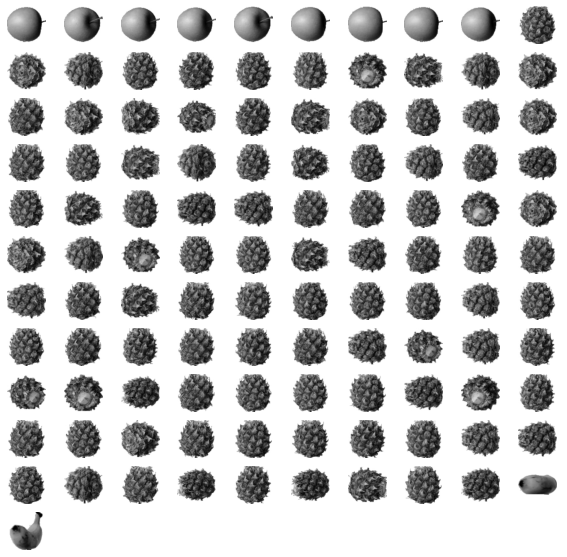

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 0])

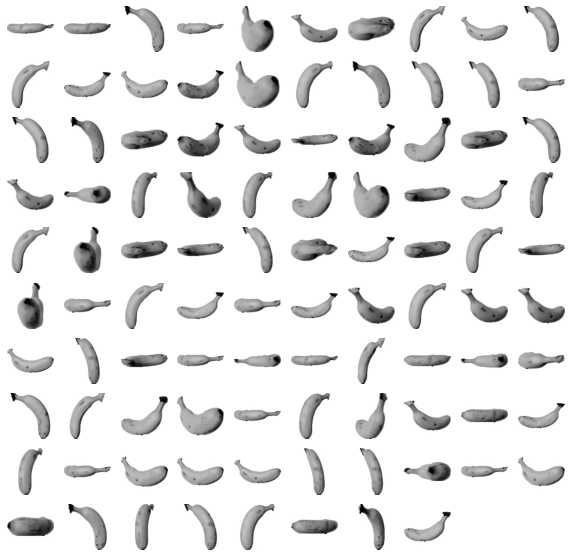

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 1])

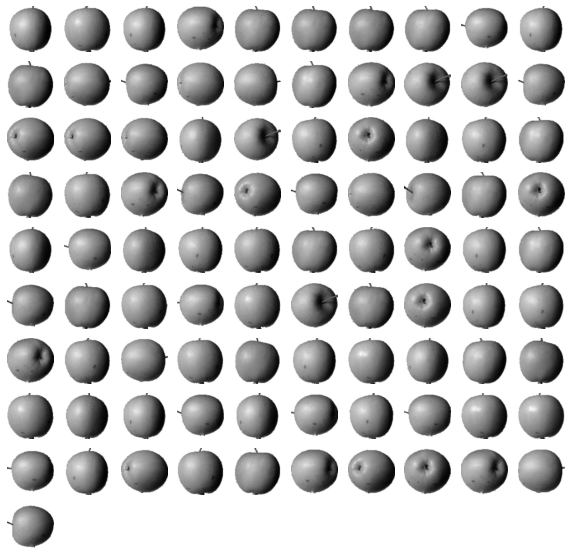

In [ ]:
plot_cluster(fruits_2d[kmeans.labels_ == 2])

## KMeans가 찾은 `cluster_centers_` : 클러스터의 중심(centroid)

In [ ]:
kmeans.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

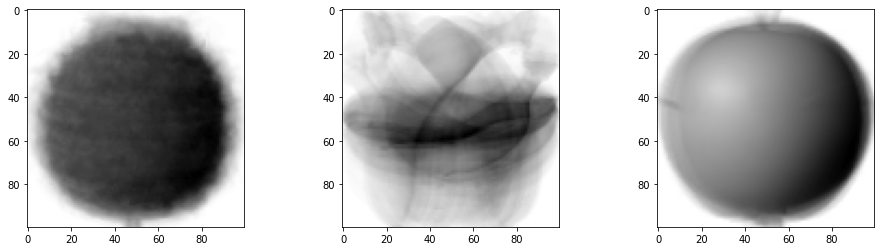

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
for i, centroid in enumerate(kmeans.cluster_centers_):
    img = centroid.reshape((100, 100)) # (10000,) 1차원 배열 → 2차원 배열
    ax[i].imshow(img, cmap='binary')

plt.show()

# 훈련 샘플에서 클러스터들의 중심까지의 거리 계산

In [ ]:
distances = kmeans.transform(fruits_2d)
distances.shape # (n_samples, n_clusters)
# 각 샘플에서 클러스터 중심들까지의 거리

(300, 3)

In [ ]:
distances[:6]

array([[4677.10527943, 8642.61845541, 3087.33092099],
       [5363.9344124 , 9030.55531495, 2641.34592861],
       [4637.76848934, 8494.99543011, 3122.48819955],
       [5319.2368841 , 9132.8299753 , 3032.41637343],
       [5039.67898148, 8461.52728232, 2656.96823141],
       [4368.90682127, 7855.57817995, 4874.81067384]])

In [ ]:
labels = np.argmin(distances, axis=1) # 3개의 클러스터 중심들까지의 거리들 중 최솟값
labels

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
kmeans.predict(fruits_2d[:10]) # centroid들까지의 거리를 계산하고 가장 짧은 거리의 인덱스를 리턴.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

## 최적의 k값 찾기

__inertia__ :

* 클러스터의 중심과 그 클러스터에 속한 샘플 사이의 거리들의 제곱의 합
* 클러스터에 속한 샘플들이 얼마나 가깝게 모여 있는지를 나타내는 값
    * inertia가 작으면 → 샘플들이 클러스터 중심에서 가깝게 모여 있음.
    * inertia가 크면 → 샘플들이 클러스터 중심에서 멀리 퍼져 있음.
* k값(클러스터 개수)이 크면 클수록 inertia 작아짐.

In [ ]:
kmeans.inertia_ # k=3일때 inertia

5074977316.088373

In [ ]:
# k 값을 2 ~ 7까지 변화시키면서 inertia 계산
inertias = []
k_values = np.arange(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fruits_2d)
    inertias.append(kmeans.inertia_)

print(inertias)

[5856532545.983113, 5074977316.088373, 4673588404.856072, 4344167864.512113, 3997030130.9539833, 3776049057.608836]


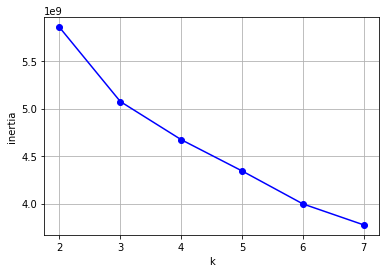

In [ ]:
plt.plot(k_values, inertias, 'bo-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

* k값을 증가시키면 inertia는 계속 작아짐.
* k값에 따라서 inertia의 기울기가 크게 줄어들다가, 기울기가 완만하게 줄어듦.
* elbow : 기울기의 차이가 많이 생기는 부분
* elbow의 위치가 최적의 k값.

# Exercise

* iris 데이터 셋 사용
* k=[2, 7) 값에 따른 inertia를 계산하고 시각화
* k=3일 때, KMeans가 찾은 클러스터 중심을 출력하고, petal_length ~ petal_width만 시각화
* k=3일 때, KMeans가 찾은 label과 실제 label을 비교

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data.copy()

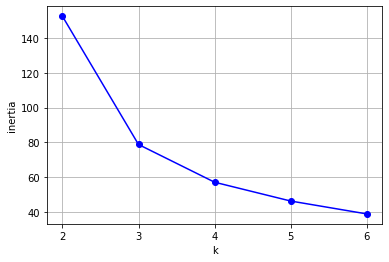

In [ ]:
inertias = []
k_values = np.arange(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.plot(k_values, inertias, 'bo-')
plt.xlabel('k')
plt.xticks(np.arange(2, 7))
plt.ylabel('inertia')
plt.grid()
plt.show()

elbow = 3으로 볼 수 있음.

In [ ]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)

KMeans(n_clusters=3)

In [ ]:
# k=3일 때, KMeans가 찾은 클러스터 중심을 출력
kmeans_3.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# petal_length ~ petal_width만 시각화
pl = kmeans_3.cluster_centers_[:, 2]
pw = kmeans_3.cluster_centers_[:, 3]
print('Petal Length :', pl, 'Petal Width :', pw)

Petal Length : [1.462      4.39354839 5.74210526] Petal Width : [0.246      1.43387097 2.07105263]


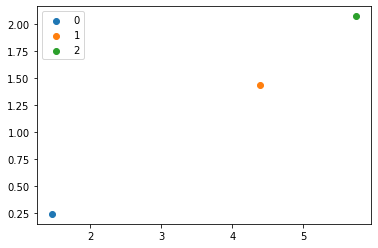

In [ ]:
for i in range(0, 3):
    plt.scatter(pl[i],pw[i], label=i)

plt.legend()
plt.show()

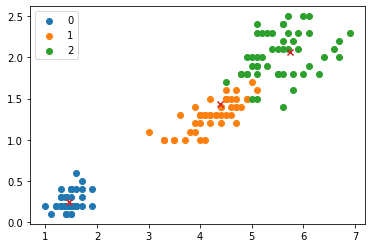

In [ ]:
for i in range(0, 3):
    plt.scatter(iris.data[iris.target == i][:, 2], iris.data[iris.target == i][:, 3], label=i)

plt.scatter(pl, pw, marker='x')

plt.legend()
plt.show()

In [ ]:
# k=3일 때, KMeans가 찾은 label과 실제 label을 비교
kmeans_3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Accuracy
print('Accuracy :', round(sum(kmeans_3.labels_ == y) / len(y), 4))

Accuracy : 0.8933


# PCA(Principal Component Analysis, 주성분 분석)

* PCA 순서 :
    * 훈련 셋에서 분산의 가장 많은 부분을 설명하는 축(axis)을 찾음.
    * 그 축에 수직(orthogonal)이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    * 이전의 두 축에 모두 수직이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    * 위 과정을 계속 반복.

* 설명된 분산 비율(explained variance ratio) : 데이터 셋의 분산이 각 주성분 축에 따라 놓여 있는 비율.

* PCA는 주성분의 개수 또는 설명된 분산 비율을 설정해서 데이터 셋의 차원을 축소하는 방법.

In [ ]:
fruits.shape # (n_samples, height, width)

(300, 100, 100)

In [ ]:
fruits_2d.shape # (n_samples, n_pixels=height×width)

(300, 10000)

In [ ]:
pca = PCA(n_components=50) # 주성분(pricipal components) 50개를 찾는 PCA

In [ ]:
pca.fit(fruits_2d) # 학습(훈련) - 주성분을 찾음

PCA(n_components=50)

In [ ]:
pca.components_.shape # PCA가 찾은 50개 주성분 - (n_components, n_features)

(50, 10000)

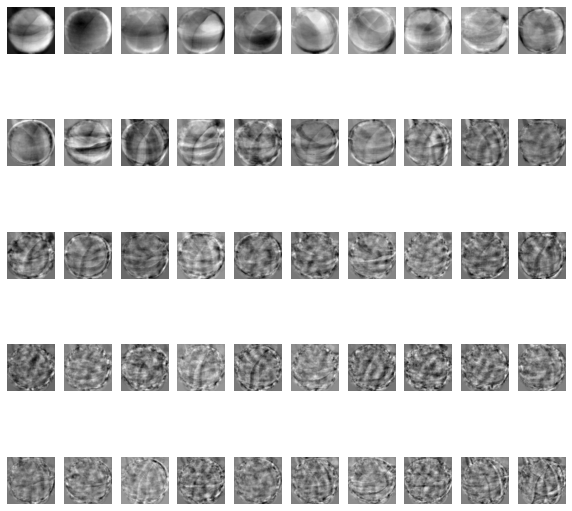

In [ ]:
plot_cluster(pca.components_)

## 차원 축소 : `pca.transform(X)`

In [ ]:
fruits_2d_pca = pca.transform(fruits_2d)

In [ ]:
fruits_2d_pca.shape # (n_samples, n_features)

(300, 50)

## 차원 재구성 : `pca.inverse_transform(X)`

In [ ]:
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)

In [ ]:
fruits_2d_inv.shape # (n_samples, n_features)

(300, 10000)

원본 이미지와 차원이 재구성된 이미지 비교

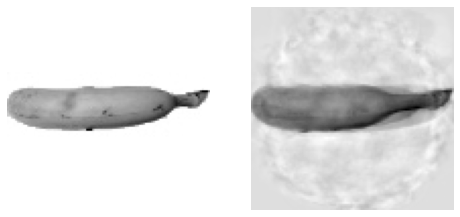

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
# 원본 이미지
ax[0].imshow(fruits[200], cmap=plt.cm.binary)
ax[0].axis('off')
# PCA 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[200].reshape((100, 100)) # (10000,) → (100, 100)
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

## 설명된 분산(explained variance)

In [ ]:
pca.explained_variance_.shape

(50,)

In [ ]:
pca.explained_variance_

array([13825250.21582001,  3244970.17261193,  2147002.11072804,
        1315766.76701664,  1115261.57182832,  1071019.42512489,
         839909.33515168,   670735.97207943,   447908.41098515,
         438278.50200035,   376058.33808973,   308314.26897834,
         286653.15195347,   276360.41618873,   226209.94711116,
         210588.30806734,   188950.49363743,   166855.31257908,
         158754.54903505,   156784.01266007,   146172.38785183,
         142739.67959122,   133183.50292385,   127125.37599056,
         121564.19732028,   117269.68791795,   108183.67294589,
         103743.38288881,    99330.30819874,    99125.19257909,
          94286.35384774,    90011.44702187,    86464.03811491,
          83462.96182102,    82258.13143008,    80726.40074711,
          78219.41937106,    75415.82792445,    72538.27990127,
          70798.5482636 ,    69718.02632237,    63992.18486669,
          62910.30921023,    62192.81285601,    60308.58784658,
          59653.46969643,    56556.09782

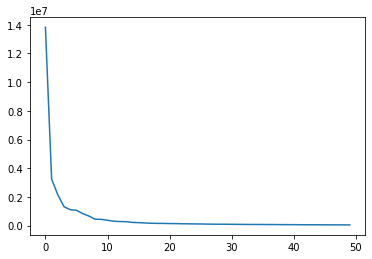

In [ ]:
plt.plot(pca.explained_variance_, '-')
plt.show()

In [ ]:
cumsum_var = np.cumsum(pca.explained_variance_) # cumulative sum : 누적 합계
cumsum_var

array([13825250.21582001, 17070220.38843194, 19217222.49915998,
       20532989.26617663, 21648250.83800495, 22719270.26312984,
       23559179.59828152, 24229915.57036095, 24677823.9813461 ,
       25116102.48334644, 25492160.82143617, 25800475.09041451,
       26087128.24236798, 26363488.65855671, 26589698.60566787,
       26800286.91373521, 26989237.40737263, 27156092.71995172,
       27314847.26898677, 27471631.28164684, 27617803.66949867,
       27760543.34908989, 27893726.85201374, 28020852.22800431,
       28142416.42532459, 28259686.11324254, 28367869.78618842,
       28471613.16907724, 28570943.47727598, 28670068.66985507,
       28764355.02370281, 28854366.47072468, 28940830.50883959,
       29024293.47066062, 29106551.6020907 , 29187278.00283781,
       29265497.42220887, 29340913.25013332, 29413451.53003459,
       29484250.07829819, 29553968.10462056, 29617960.28948725,
       29680870.59869748, 29743063.41155348, 29803371.99940006,
       29863025.4690965 , 29919581.56692

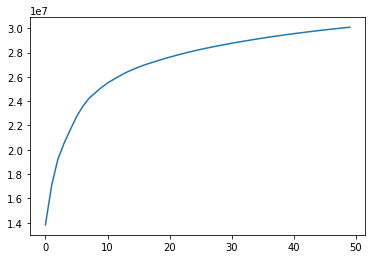

In [ ]:
plt.plot(cumsum_var, '-')
plt.show()

## 설명된 분산 비율(explained variance ratio)

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511202, 0.00486383, 0.00480346,
       0.00447835, 0.00437318, 0.0040804 , 0.0038948 , 0.00372441,
       0.00359284, 0.00331447, 0.00317843, 0.00304323, 0.00303694,
       0.00288869, 0.00275772, 0.00264904, 0.00255709, 0.00252018,
       0.00247325, 0.00239644, 0.00231055, 0.00222239, 0.00216909,
       0.00213598, 0.00196056, 0.00192741, 0.00190543, 0.0018477 ,
       0.00182763, 0.00173273, 0.00169172, 0.00162285, 0.00158072])

In [ ]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

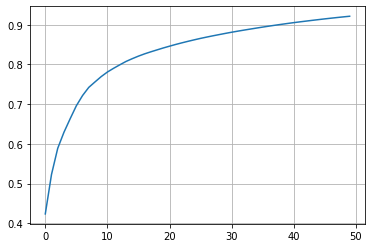

In [ ]:
plt.plot(cumsum_var_ratio)
plt.grid()
plt.show()

## 주성분 개수 선택

In [ ]:
pca = PCA()             # 주성분 분석 객체 생성
pca.fit(fruits_2d)      # 주성분 분석 수행
pca.components_.shape   # PCA가 찾은 주성분

(300, 10000)

In [ ]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_var_ratio[-10:]

array([0.99990994, 0.99992336, 0.9999362 , 0.99994888, 0.99996113,
       0.99997293, 0.99998405, 0.99999216, 1.        , 1.        ])

In [ ]:
d = np.argmax(cumsum_var_ratio >= 0.95) # 설명된 분산 비율의 누적값이 95% 이상인 주성분 개수
d

73

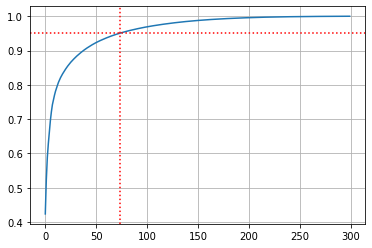

In [ ]:
plt.plot(cumsum_var_ratio)
plt.axhline(y=0.95, linestyle=":", color='red')
plt.axvline(x=d, linestyle=':', color='red')
plt.grid()
plt.show()

데이터 셋 전체 분산의 95%를 설명하는 주성분 분석

In [ ]:
# n_components : 정수 (주성분 개수), 0 ~ 1 실수 (주성분으로 설명되는 분산의 비율)
pca = PCA(n_components=0.95)
pca.fit(fruits_2d)
pca.components_.shape

(74, 10000)

In [ ]:
# 차원 축소
fruits_2d_pca = pca.transform(fruits_2d)
fruits_2d_pca.shape

(300, 74)

In [ ]:
# 복원
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)
fruits_2d_inv.shape

(300, 10000)

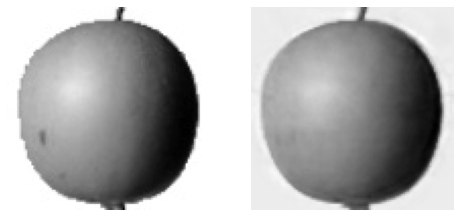

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[0].reshape((100, 100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')
plt.show()

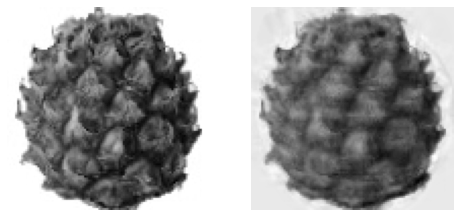

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[100].reshape((100, 100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')
plt.show()

## PCA 응용 : 시각화

In [ ]:
pca = PCA(n_components=2)
fruits_2d_pca = pca.fit_transform(fruits_2d)
fruits_2d_pca.shape

(300, 2)

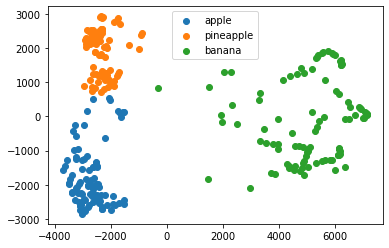

In [ ]:
plt.scatter(fruits_2d_pca[:100, 0], fruits_2d_pca[:100, 1], label='apple')
plt.scatter(fruits_2d_pca[100:200, 0], fruits_2d_pca[100:200, 1], label='pineapple')
plt.scatter(fruits_2d_pca[200:, 0], fruits_2d_pca[200:, 1], label='banana')
plt.legend()
plt.show()

MNIST 데이터 셋에서 주성분 2개를 찾고, 변화된 데이터들을 2차원 평면에 시각화.

In [ ]:
mnist = datasets.fetch_openml('mnist_784')

In [ ]:
X = mnist['data'].values.copy()
y = mnist['target'].values.astype('int').copy()

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [ ]:
pca = PCA(n_components=2)

In [ ]:
mnist_pca = pca.fit_transform(X)
mnist_pca.shape

(70000, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

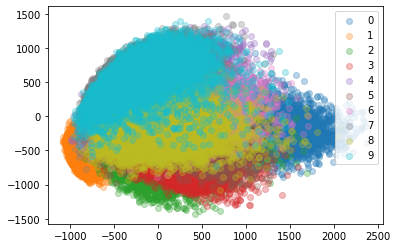

In [ ]:
for i in range(0, 10):
    plt.scatter(mnist_pca[y==i, 0], mnist_pca[y==i, 1], label=i, alpha=0.3)

plt.legend()
plt.show()

## PCA 응용 : 전처리

In [ ]:
X = fruits_2d # data
y = np.array([0] * 100 + [1] * 100 + [2] * 100) # target

### PCA 사용 전

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression(random_state=42, n_jobs=-1)

In [ ]:
cv = cross_validate(estimator=logistic, X=X, y=y, n_jobs=-1, return_train_score=True)

In [ ]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [ ]:
np.mean(cv['fit_time'])

2.1512423038482664

In [ ]:
np.mean(cv['train_score'])

1.0

In [ ]:
np.mean(cv['test_score'])

0.9966666666666667

### PCA 적용 후

In [ ]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [ ]:
X.shape, X_pca.shape

((300, 10000), (300, 50))

In [ ]:
cv = cross_validate(estimator=LogisticRegression(random_state=42, n_jobs=-1),
                    X=X_pca, y=y, n_jobs=-1, return_train_score=True)

In [ ]:
np.mean(cv['fit_time'])

0.12969202995300294

In [ ]:
np.mean(cv['train_score'])

1.0

In [ ]:
np.mean(cv['test_score'])

1.0